# Regression 

Objective: Learn the basics of applying ML model for regression problems

* Spliting data for train and test
* Metrics for regression models are different from classification
* Compare the ML model to the exact Stat model

## Quick example - Single variable

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

(1000,) (1000,)


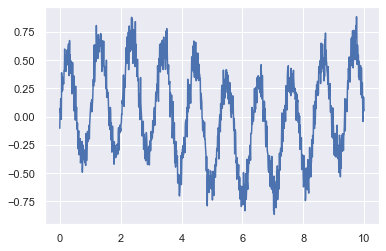

In [2]:

X = np.linspace(0, 10, 1000)
def model(x, sigma=0.1):
    fast_oscillation = np.sin(6 *x)
    slow_oscillation = np.sin(0.75 * x)
    noise = sigma * np.random.randn(len(x))

    return 0.2*slow_oscillation + 0.5*fast_oscillation + noise

y = model(X)
plt.plot(X, y)
print(X.shape, y.shape)

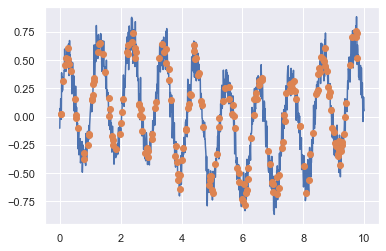

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=73)

from sklearn.ensemble import RandomForestRegressor
reg_model = RandomForestRegressor(100)
reg_model.fit(X_train[:,None], y_train)
y_pred = reg_model.predict(X_test[:,None])

plt.plot(X, y)
plt.plot(X_test, y_pred, 'o')

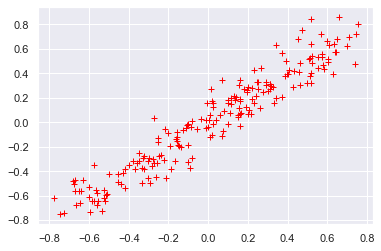

In [4]:
plt.plot(y_pred, y_test, '+', color='red')

In [5]:
from sklearn import metrics
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error (MAE): 0.0898423603540986
Mean square error (MSE): 0.013383564520274333
Root mean square error (RMSE): 0.11568735678661836


### Multiple variable

In [6]:
# Import make_regression method to generate artificial data samples 
from sklearn.datasets import make_regression

In [7]:
n_samples = 100 # Number of samples
n_features = 6 # Number of features
n_informative = 3 # Number of informative features i.e. actual features which influence the output

In [8]:

X, y,coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative,
                       random_state=None, shuffle=False,noise=20,coef=True)

### Make a data frame and create basic visualizations

In [9]:
df1 = pd.DataFrame(data=X,columns=['X'+str(i) for i in range(1,n_features+1)])
df2=pd.DataFrame(data=y,columns=['y'])
df=pd.concat([df1,df2],axis=1)
df.head(10)

,X1,X2,X3,X4,X5,X6,y
0,-1.395810,-1.157364,0.093246,-1.062825,0.616567,0.749009,-88.939941
1,-0.454280,2.134787,1.086550,-0.613648,0.875109,-0.553521,174.317749
2,-1.933750,-0.316431,-1.432866,0.215237,-0.045853,-2.660368,-157.621379
3,0.633127,0.631144,-2.083992,0.744241,-0.601685,0.063784,-71.143706
4,1.528136,1.590903,-0.444600,0.589394,-1.352079,-0.948586,92.021814
5,1.018645,0.268210,-0.786065,-0.564923,-1.320675,-0.701373,-35.583785
6,-0.953745,-0.131514,-0.426883,0.076145,-0.252862,0.360328,-10.446010
7,-1.000098,-1.397324,0.528772,0.642259,-0.403305,-0.191671,-45.523546
8,0.407768,-0.697581,0.745377,-0.709378,-1.327902,-0.880910,8.152810
9,-0.165313,-1.549363,0.191449,0.622176,0.104739,0.533685,-65.144252


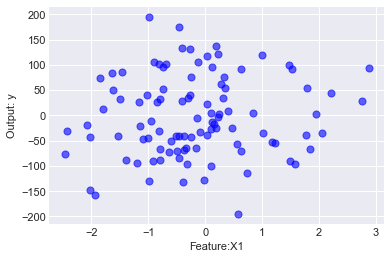

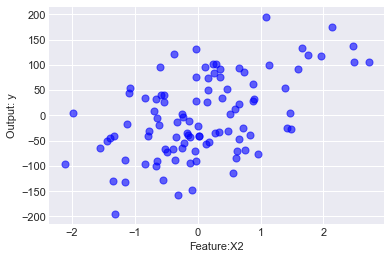

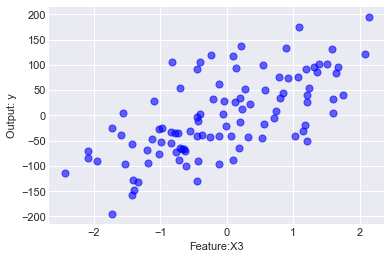

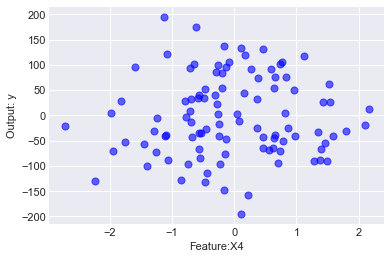

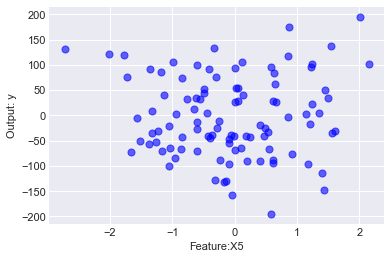

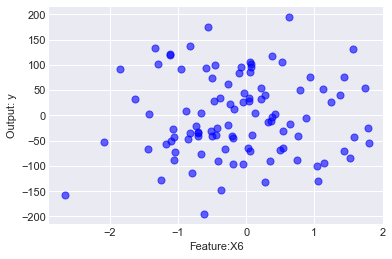

In [10]:
with plt.style.context(('seaborn-dark')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=11)
        plt.ylabel('Output: y',fontsize=11)
        plt.scatter(df[col],df['y'],c='blue',s=50,alpha=0.6)

It is clear from the scatter plots that some of the features influence the output while the others don't. 

In [11]:
#### Histogram of the features

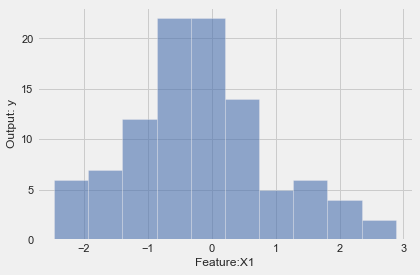

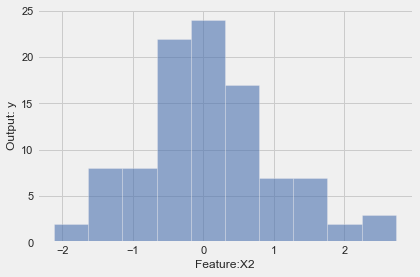

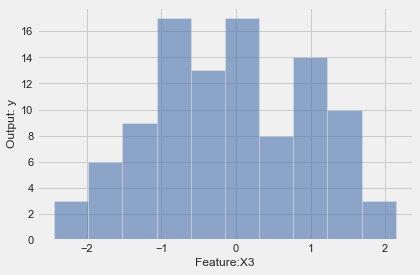

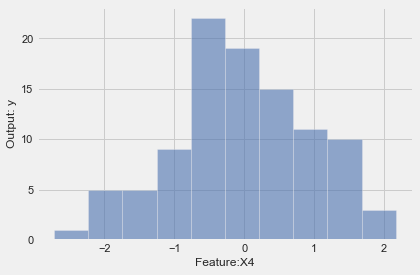

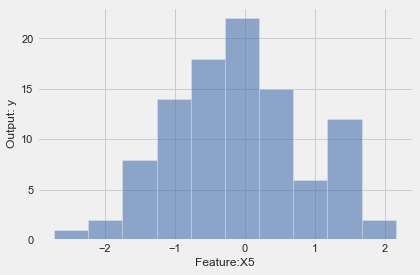

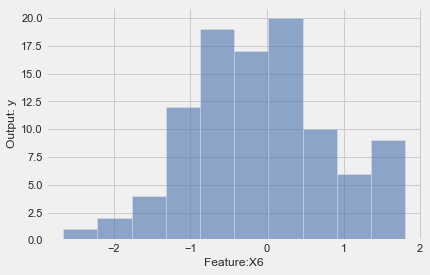

In [12]:
with plt.style.context(('fivethirtyeight')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.hist(df[col],alpha=0.6,facecolor='b')

### Fit the model

In [13]:
model = RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=100)
model.fit(X, y)

RandomForestRegressor(max_depth=5, max_leaf_nodes=5)

#### Print important features

Relative importance of the features:  [9.67702334e-03 4.01871221e-01 5.83065542e-01 5.17922370e-04
 4.12668003e-03 7.41610649e-04]


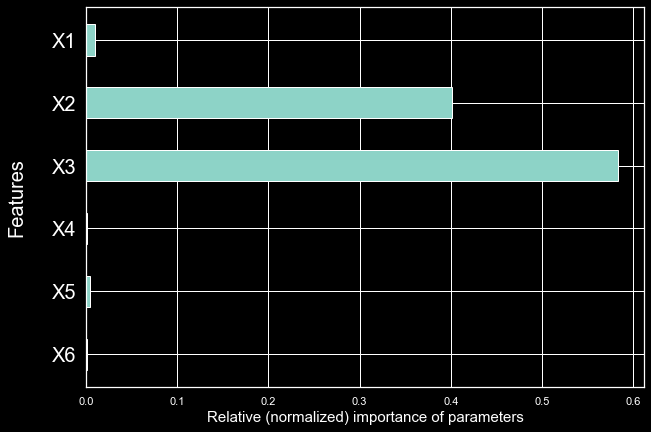

In [14]:
print("Relative importance of the features: ",model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=model.feature_importances_,height=0.5)

In [15]:
print("Regression coefficient:",model.score(X,y))

Regression coefficient: 0.8121747830673558


### Compare to exact Stat Model

Benchmark to statsmodel (ordinary least-square solution by exact analytic method)
Statsmodel is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [16]:
import statsmodels.api as sm

In [17]:
Xs=sm.add_constant(X)
stat_model = sm.OLS(y,Xs)
stat_result = stat_model.fit()

In [18]:
print(stat_result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     266.8
Date:                Sun, 30 May 2021   Prob (F-statistic):           2.56e-56
Time:                        12:13:08   Log-Likelihood:                -433.94
No. Observations:                 100   AIC:                             881.9
Df Residuals:                      93   BIC:                             900.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5289      1.982      0.267      0.7

In [19]:
rf_coef=np.array(coef)
stat_coef=np.array(stat_result.params[1:])


In [20]:
df_coef = pd.DataFrame(data=[rf_coef,stat_coef],columns=df.columns[:-1],index=['True Regressors', 'OLS method estimation'])
df_coef

,X1,X2,X3,X4,X5,X6
True Regressors,15.634440,56.092687,63.891554,0.000000,0.000000,0.000000
OLS method estimation,17.314946,54.755754,63.987989,-0.347505,0.722975,3.207216


In [21]:
df_importance = pd.DataFrame(data=[model.feature_importances_,stat_result.tvalues[1:]/sum(stat_result.tvalues[1:])],
                             columns=df.columns[:-1],
                             index=['RF Regressor relative importance', 'OLS method normalized t-statistic'])
df_importance

,X1,X2,X3,X4,X5,X6
RF Regressor relative importance,0.009677,0.401871,0.583066,0.000518,0.004127,0.000742
OLS method normalized t-statistic,0.133557,0.372913,0.469914,-0.002466,0.005092,0.020989


In [22]:
model.feature_importances_

array([9.67702334e-03, 4.01871221e-01, 5.83065542e-01, 5.17922370e-04,
       4.12668003e-03, 7.41610649e-04])

## Summary
* The metrics for regressions are different from classifications. 
* It is possible to test the ML performance with respect to stats models. 